# TP bagging and random forest

In [78]:
from scipy.stats import binom
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

## Math question

In [3]:
L = 10
p = 0.7
rv = binom(L, p)

## Bagging

### Question 1

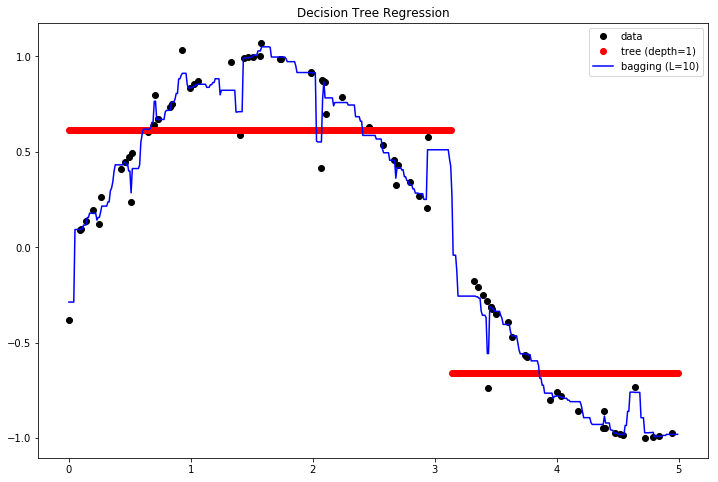

In [25]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 #L in the text
tree_max_depth = 10

# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)
bagging = BaggingRegressor(n_estimators=n_estimators)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, 'o', c="r", label="tree (depth=1)")
plt.plot(X_test, y_bagging, '-', c="b", label="bagging (L=10)")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

### Questions 2 and 3

Variance of the regression with tree of depth 3 : 0.4753593670964486
Variance of the regression with tree of depth 5 : 0.5045450151531009
Variance of the regression with tree of depth 7 : 0.5013808126091277
Variance of the regression with tree of depth 10 : 0.5046596855030244


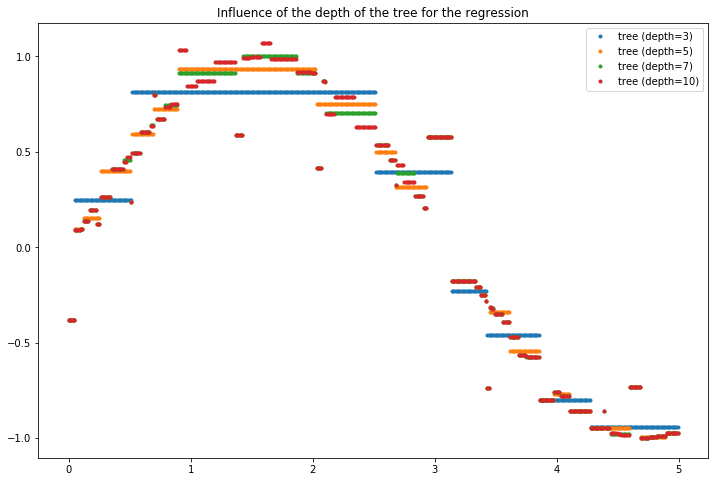

In [50]:
max_depth = [3,5,7,10]
plt.figure(figsize=(12, 8))

for i in range(4):
    tree = DecisionTreeRegressor(max_depth=max_depth[i])
    tree.fit(X, y) 
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    #Question 3
    print("Variance of the regression with tree of depth "+str(max_depth[i])+ " : " +str(np.var(y_tree)))
    plt.plot(X_test, y_tree, '.',label="tree (depth="+str(max_depth[i])+")")

plt.title("Influence of the depth of the tree for the regression")
plt.legend(loc=1, numpoints=1)
plt.show()

Variance of the regression with bagging with 3 estimators : 0.49516962204993753
Variance of the regression with bagging with 5 estimators : 0.5007129322437104
Variance of the regression with bagging with 7 estimators : 0.5052163082942984
Variance of the regression with bagging with 10 estimators : 0.4796269050430957


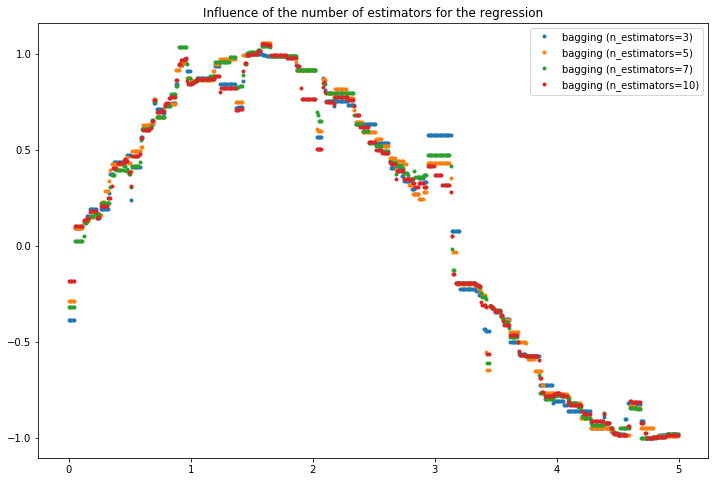

In [52]:
n_estimators = [3,5,7,10]
plt.figure(figsize=(12, 8))

for i in range(4):
    bagging = BaggingRegressor(n_estimators=n_estimators[i])
    bagging.fit(X, y) 
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_bagging = bagging.predict(X_test)
    #Question 3
    print("Variance of the regression with bagging with "+str(n_estimators[i])+ " estimators : " +str(np.var(y_bagging)))
    plt.plot(X_test, y_bagging, '.',label="bagging (n_estimators="+str(n_estimators[i])+")")

plt.title("Influence of the number of estimators for the regression")
plt.legend(loc=1, numpoints=1)
plt.show()

### Question 4

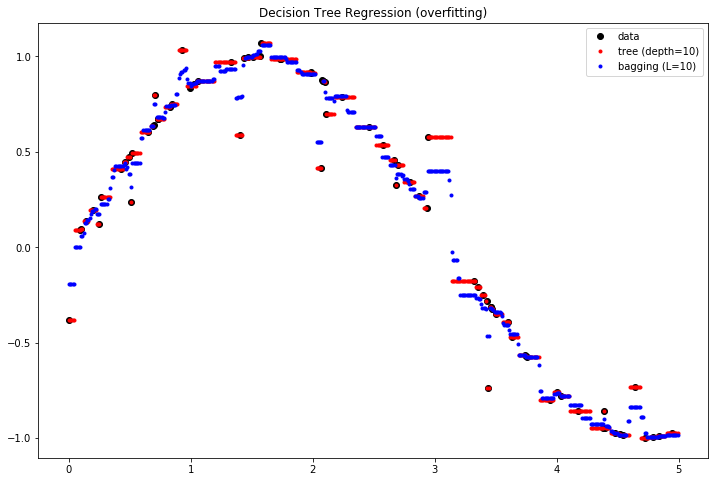

In [56]:
# Create a random dataset with a higher level of noise
rng = np.random.RandomState(1)
y_noise = np.sin(X).ravel()
y_noise[::5] += 10 * (0.5 - rng.rand(16))

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X, y)
bagging = BaggingRegressor(n_estimators=10)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, '.', c="r", label="tree (depth=10)")
plt.plot(X_test, y_bagging, '.', c="b", label="bagging (L=10)")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression (overfitting)")
plt.legend(loc=1, numpoints=1)
plt.show()

We can see that the regression is overfit because the noise is fitted by the regression.

### Question 5

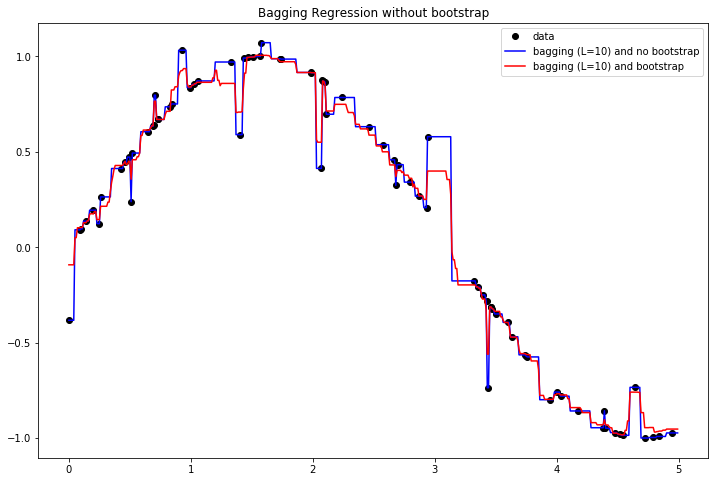

In [62]:
bagging = BaggingRegressor(n_estimators=10, bootstrap=False)
bagging_t = BaggingRegressor(n_estimators=10, bootstrap=True)
bagging.fit(X, y)
bagging_t.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_bagging = bagging.predict(X_test)
y_bagging_t = bagging_t.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_bagging, '-', c="b", label="bagging (L=10) and no bootstrap")
plt.plot(X_test, y_bagging_t, '-', c="r", label="bagging (L=10) and bootstrap")
# TODO add plots for Bagging/Tree
plt.title("Bagging Regression without bootstrap")
plt.legend(loc=1, numpoints=1)
plt.show()

## Random Forest

### Question 6

In [80]:
rand_forest_class = RandomForestClassifier(random_state=0, n_estimators=10)
rand_forest_reg = RandomForestRegressor(random_state=0, n_estimators=10)
svc = SVC(kernel='linear')
svr = SVR(kernel='linear')

#iris
iris = load_iris()
scores_forest = cross_val_score(rand_forest_class, iris.data, iris.target, cv=7)
print("Score for random forest on iris: %0.2f (+/- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))
scores_svm = cross_val_score(svc, iris.data, iris.target, cv=7)
print("Score for svm on iris: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

#boston
boston = load_boston()
scores_forest = cross_val_score(rand_forest_reg, boston.data, boston.target, cv=7, error_score=np.nan)
print("Score for random forest on boston: %0.2f (+/- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))
scores_svm = cross_val_score(svr, boston.data, boston.target, cv=7, error_score=np.nan)
print("Score for svm on boston: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

#diabetes
diabetes = load_diabetes()
scores_forest = cross_val_score(rand_forest_reg, diabetes.data, diabetes.target, cv=7, error_score=np.nan)
print("Score for random forest on diabetes: %0.2f (+/- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))
scores_svm = cross_val_score(svr, boston.data, boston.target, cv=7, error_score=np.nan)
print("Score for svm on diabetes: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

#digits
digits = load_digits()
scores_forest = cross_val_score(rand_forest_class, digits.data, digits.target, cv=7, error_score=np.nan)
print("Score for random forest on digits: %0.2f (+/- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))
scores_svm = cross_val_score(svc, boston.data, boston.target, cv=7, error_score=np.nan)
print("Score for svm on digits: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))


Score for random forest on iris: 0.95 (+/- 0.09)
Score for svm on iris: 0.97 (+/- 0.05)
Score for random forest on boston: 0.63 (+/- 0.32)
Score for svm on boston: 0.51 (+/- 0.71)
Score for random forest on diabetes: 0.38 (+/- 0.11)
Score for svm on diabetes: 0.51 (+/- 0.71)
Score for random forest on digits: 0.89 (+/- 0.08)
Score for svm on digits: nan (+/- nan)


/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:559: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:5

### Question 7

In [87]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
    tree.predict(xx,yy)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 432x288 with 0 Axes>